In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

D:\Programas\Anaconda\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [4]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [8]:
tipos_ursos = 'grizzly','black','teddy','polar'
path = Path('bears')

In [9]:
if not path.exists():
    path.mkdir()
    for o in tipos_ursos:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [10]:
fns = get_image_files(path)
fns

(#571) [Path('bears/black/00000000.JPG'),Path('bears/black/00000001.jpg'),Path('bears/black/00000002.jpg'),Path('bears/black/00000003.jpg'),Path('bears/black/00000004.jpg'),Path('bears/black/00000005.jpg'),Path('bears/black/00000006.jpg'),Path('bears/black/00000007.jpg'),Path('bears/black/00000008.jpg'),Path('bears/black/00000009.jpg')...]

In [12]:
failed = verify_images(fns)
failed

(#2) [Path('bears/polar/00000103.jpg'),Path('bears/teddy/00000109.jpg')]

In [13]:
failed.map(Path.unlink);

In [14]:
ursos = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [15]:
dls = ursos.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [16]:
ursos = ursos.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = ursos.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


D:\Programas\Anaconda\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [17]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.759197,0.112936,0.035398,01:48


D:\Programas\Anaconda\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.188122,0.098730,0.035398,02:16
1,0.143183,0.050606,0.026549,02:20
2,0.113085,0.041629,0.017699,02:21
3,0.106454,0.036873,0.017699,02:32


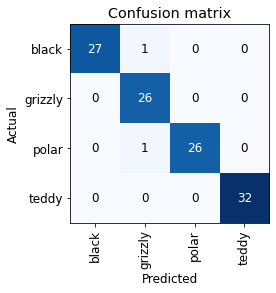

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [21]:
learn_inf = load_learner(path/'aula3101-p2.pkl')

In [22]:
#learn_inf.predict('images/grizzly.jpg')
learn_inf.predict('bears/polar/00000004.jpg')

('polar',
 TensorBase(2),
 TensorBase([7.4618e-06, 1.3777e-04, 9.9985e-01, 5.2324e-07]))

In [23]:
learn_inf.dls.vocab

['black', 'grizzly', 'polar', 'teddy']

In [24]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [29]:
img = PILImage.create(btn_upload.data[-1])

In [30]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
#with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [31]:
with out_pl: display(img.to_thumb(128,128))

In [32]:
pred,pred_idx,probs = learn_inf.predict(img)

In [33]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: polar; Probability: 0.9999')

In [34]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [35]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [36]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [37]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])